In [1]:
pip install pandas
pip install numpy
pip install matplotlib

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.patches as patches
from matplotlib import pyplot as plt

In [2]:
# Specify the file path to the CSV file
filePath = '/home/coder/project/Amazon Sale Report.csv'

# Read the CSV file located at 'filePath' into a pandas DataFrame
df = pd.read_csv(filePath)


In [3]:
# Get the dimensions of the DataFrame
df.shape

(5733, 24)

In [4]:
# Display the first 5 rows of the DataFrame to get a quick overview of the dataset's structure and contents
df.head()

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B,fulfilled-by,Unnamed: 22
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,Set,...,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,NaN,False,Easy Ship,NaN
1,1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta,...,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship,NaN
2,2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3371,JNE3371-KR-XL,kurta,...,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,True,NaN,NaN
3,3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,J0341,J0341-DR-L,Western Dress,...,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,NaN,False,Easy Ship,NaN
4,4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3671,JNE3671-TU-XXXL,Top,...,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,NaN,False,NaN,NaN


In [5]:
# Summarizing the dataset structure
summary = {
    "Column Name": df.columns,
    "Data Type": df.dtypes.values,
    "Missing Values": df.isnull().sum().values,
    "Unique Values": df.nunique().values,
}

# Creating a summary DataFrame
summary_df = pd.DataFrame(summary)

# Dynamically filling "Potential Entity" to match the column count
summary_df["Potential Entity"] = [
    "Undetermined Entity" for _ in range(len(summary_df))
]

# Display the summary table
summary_df

,Column Name,Data Type,Missing Values,Unique Values,Potential Entity
0,index,int64,0,5733,Undetermined Entity
1,Order ID,object,0,5390,Undetermined Entity
2,Date,object,0,4,Undetermined Entity
3,Status,object,0,6,Undetermined Entity
4,Fulfilment,object,0,2,Undetermined Entity
5,Sales Channel,object,0,2,Undetermined Entity
6,ship-service-level,object,0,2,Undetermined Entity
7,Style,object,0,822,Undetermined Entity
8,SKU,object,0,2253,Undetermined Entity
9,Category,object,0,8,Undetermined Entity


In [6]:
# Renaming the columns to align with the database schema
df.rename(columns={
    'Order ID': 'OrderID',
    'Fulfilment': 'Fulfillment',
    'Sales Channel ': 'SalesChannel',
    'ship-service-level': 'ShipServiceLevel',
    'ship-city': 'ShipCity',
    'ship-state': 'ShipState',
    'ship-postal-code': 'ShipPostalCode',
    'ship-country': 'ShipCountry',
    'promotion-ids': 'PromotionIDs',
    'fulfilled-by': 'FulfilledBy'
}, inplace=True)

# Verifying the updated column names
df.columns


Index(['index', 'OrderID', 'Date', 'Status', 'Fulfillment', 'SalesChannel',
       'ShipServiceLevel', 'Style', 'SKU', 'Category', 'Size', 'ASIN',
       'Courier Status', 'Qty', 'currency', 'Amount', 'ShipCity', 'ShipState',
       'ShipPostalCode', 'ShipCountry', 'PromotionIDs', 'B2B', 'FulfilledBy',
       'Unnamed: 22'],
      dtype='object')

In [7]:
df.shape

(5733, 24)

In [8]:
df.isnull().sum()

index                  0
OrderID                0
Date                   0
Status                 0
Fulfillment            0
SalesChannel           0
ShipServiceLevel       0
Style                  0
SKU                    0
Category               0
Size                   0
ASIN                   0
Courier Status       338
Qty                    0
currency             378
Amount               378
ShipCity               2
ShipState              2
ShipPostalCode         2
ShipCountry            2
PromotionIDs        2006
B2B                    0
FulfilledBy         3861
Unnamed: 22         5733
dtype: int64

| **Column Name**       | **Action Taken**                              | **Reasoning**                                                                                          |
|------------------------|-----------------------------------------------|--------------------------------------------------------------------------------------------------------|
| **Unnamed: 22**        | Dropped column                               | This column contained no meaningful data and had a high percentage of missing values.                 |
| **Courier Status**     | Filled missing values with `Unknown`         | To ensure no null entries for delivery status and represent missing data as "Unknown."                |
| **currency**           | Filled missing values with `INR`             | `INR` is the default currency for the dataset, ensuring uniformity in financial data.                 |
| **Amount**             | Filled missing values with the median value  | The median is robust against outliers, providing a realistic value to fill missing entries.           |
| **ShipCity**           | Filled missing values with `Unknown City`    | To avoid null entries and label missing shipping city information as `Unknown City.`                  |
| **ShipState**          | Filled missing values with `Unknown State`   | Ensures completeness of data for geographical state information with a placeholder for missing values.|
| **ShipPostalCode**     | Filled missing values with `0`               | Placeholder value for missing postal codes while maintaining numeric data integrity.                  |
| **ShipCountry**        | Filled missing values with `IN`              | Default country `IN` (India) was used to maintain consistency for domestic orders.                    |
| **PromotionIDs**       | Filled missing values with `No Promotion`    | Indicates that no promotions were applied to these orders.                                            |
| **B2B**                | Filled missing values with `No`              | Clarifies the absence of business-to-business transactions for missing entries.                       |


In [9]:
# Dropping columns with high percentage of missing values
df = df.drop(columns=['FulfilledBy', 'Unnamed: 22'])

# Filling missing values in 'Courier Status' with 'Unknown'
df['Courier Status'].fillna('Unknown', inplace=True)

# Filling missing values in 'currency' with 'INR'
df['currency'].fillna('INR', inplace=True)

# Filling missing values in 'Amount' with the median value
amount_median = df['Amount'].median()
df['Amount'].fillna(amount_median, inplace=True)

# Filling missing values in 'ShipCity' with 'Unknown City'
df['ShipCity'].fillna('Unknown City', inplace=True)

# Filling missing values in 'ShipState' with 'Unknown State'
df['ShipState'].fillna('Unknown State', inplace=True)

# Filling missing values in 'ShipPostalCode' with 0
df['ShipPostalCode'].fillna(0, inplace=True)

# Filling missing values in 'ShipCountry' with 'IN'
df['ShipCountry'].fillna('IN', inplace=True)

# Filling missing values in 'PromotionIDs' with 'No Promotion'
df['PromotionIDs'].fillna('No Promotion', inplace=True)

# Filling missing values in 'B2B' with 'No'
df['B2B'].fillna('No', inplace=True)


In [10]:
df.isnull().sum()

index               0
OrderID             0
Date                0
Status              0
Fulfillment         0
SalesChannel        0
ShipServiceLevel    0
Style               0
SKU                 0
Category            0
Size                0
ASIN                0
Courier Status      0
Qty                 0
currency            0
Amount              0
ShipCity            0
ShipState           0
ShipPostalCode      0
ShipCountry         0
PromotionIDs        0
B2B                 0
dtype: int64

In [11]:
df.describe()  # For numeric columns

,index,Qty,Amount,ShipPostalCode
count,5733.000000,5733.000000,5733.000000,5733.000000
mean,2866.000000,0.902669,620.128228,466024.255189
std,1655.118878,0.412152,266.026347,192868.436250
min,0.000000,0.000000,0.000000,0.000000
25%,1433.000000,1.000000,442.000000,380061.000000
50%,2866.000000,1.000000,568.570000,500028.000000
75%,4299.000000,1.000000,744.000000,600021.000000
max,5732.000000,15.000000,2224.000000,989898.000000


In [12]:
df.describe(include=['object'])  # For categorical columns


,OrderID,Date,Status,Fulfillment,SalesChannel,ShipServiceLevel,Style,SKU,Category,Size,ASIN,Courier Status,currency,ShipCity,ShipState,ShipCountry,PromotionIDs
count,5733,5733,5733,5733,5733,5733,5733,5733,5733,5733,5733,5733,5733,5733,5733,5733,5733
unique,5390,4,6,2,2,2,822,2253,8,11,2253,4,1,1287,47,1,290
top,404-7386718-9479548,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3405,J0230-SKD-S,Set,M,B08XNJ19QH,Shipped,INR,BENGALURU,MAHARASHTRA,IN,IN Core Free Shipping 2015/04/08 23-48-5-108
freq,7,1481,3385,3861,5717,3780,170,40,2346,1010,40,4899,5733,487,945,5733,2144


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5733 entries, 0 to 5732
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   index             5733 non-null   int64  
 1   OrderID           5733 non-null   object 
 2   Date              5733 non-null   object 
 3   Status            5733 non-null   object 
 4   Fulfillment       5733 non-null   object 
 5   SalesChannel      5733 non-null   object 
 6   ShipServiceLevel  5733 non-null   object 
 7   Style             5733 non-null   object 
 8   SKU               5733 non-null   object 
 9   Category          5733 non-null   object 
 10  Size              5733 non-null   object 
 11  ASIN              5733 non-null   object 
 12  Courier Status    5733 non-null   object 
 13  Qty               5733 non-null   int64  
 14  currency          5733 non-null   object 
 15  Amount            5733 non-null   float64
 16  ShipCity          5733 non-null   object 


# Entity Definitions and Attributes

| **Entity**       | **Attributes**                                                                                           | **Primary Key**             |
|-------------------|----------------------------------------------------------------------------------------------------------|-----------------------------|
| **Orders**        | `Order ID`, `Date`, `Status`, `Qty`, `Amount`, `currency`, `B2B`                                         | `Order ID`                  |
| **Products**      | `SKU`, `Style`, `Category`, `Size`, `ASIN`                                                               | `SKU`                       |
| **Shipping**      | `Order ID`, `ship-city`, `ship-state`, `ship-postal-code`, `ship-country`, `Courier Status`              | `Order ID` (Foreign Key)    |
| **Fulfillment**   | `Order ID`, `fulfilled-by`, `ship-service-level`                                                         | `Order ID` (Foreign Key)    |
| **Promotions**    | `Order ID`, `promotion-ids`                                                                              | `Order ID` (Foreign Key)    |
| **OrderProducts** | `Order ID`, `SKU`                                                                                       | Composite Key: `Order ID`, `SKU` |

---

## Explanation:

### 1. **Orders**:
- Represents each order and contains details such as `Order ID`, `Date`, and `Amount`.
- **Primary Key**: `Order ID`.

### 2. **Products**:
- Represents products associated with orders, including attributes like `SKU`, `Category`, and `Style`.
- **Primary Key**: `SKU`.

### 3. **Shipping**:
- Stores shipping-related details, including `ship-city`, `ship-state`, and `Courier Status`.
- **Primary Key**: None directly; relies on `Order ID` as a **Foreign Key**.

### 4. **Fulfillment**:
- Captures information about the fulfillment of orders, such as `fulfilled-by` and `ship-service-level`.
- **Primary Key**: None directly; relies on `Order ID` as a **Foreign Key**.

### 5. **Promotions**:
- Tracks promotions applied to orders through `promotion-ids`.
- **Primary Key**: None directly; relies on `Order ID` as a **Foreign Key**.

### 6. **OrderProducts**:
- Facilitates the many-to-many relationship between `Orders` and `Products`.
- Includes `Order ID` as a Foreign Key referencing `Orders`, and `SKU` as a Foreign Key referencing `Products`.
- **Primary Key**: Composite of `Order ID` and `SKU`.

---


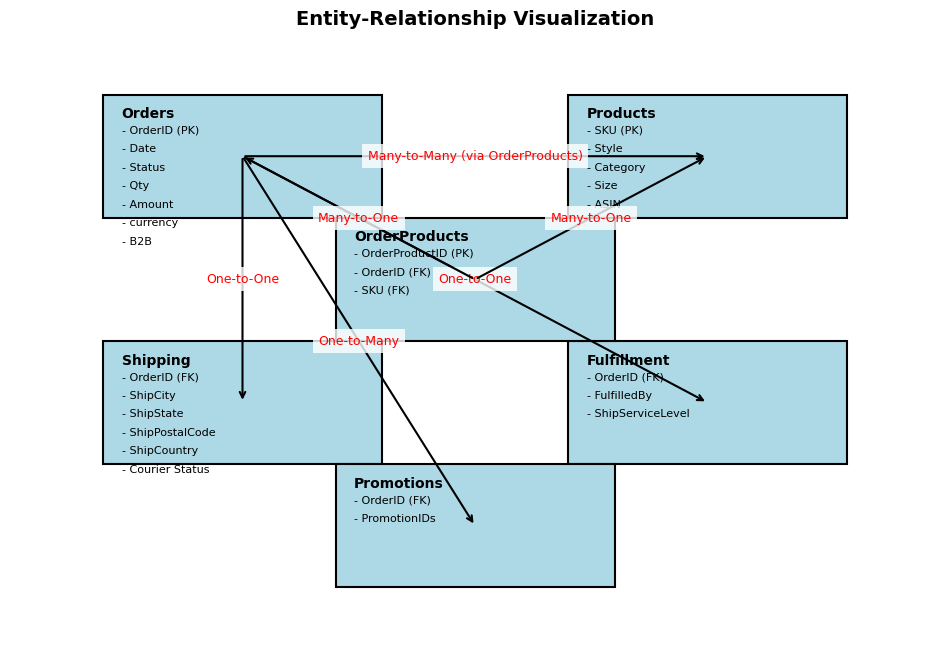

In [18]:
# Initialize the figure
fig, ax = plt.subplots(figsize=(12, 8))

# Define entity positions and sizes based on updated column names
entities = {
    "Orders": {"x": 0.1, "y": 0.7, "attributes": ["OrderID (PK)", "Date", "Status", "Qty", "Amount", "currency", "B2B"]},
    "Products": {"x": 0.6, "y": 0.7, "attributes": ["SKU (PK)", "Style", "Category", "Size", "ASIN"]},
    "Shipping": {"x": 0.1, "y": 0.3, "attributes": ["OrderID (FK)", "ShipCity", "ShipState", "ShipPostalCode", "ShipCountry", "Courier Status"]},
    "Fulfillment": {"x": 0.6, "y": 0.3, "attributes": ["OrderID (FK)", "FulfilledBy", "ShipServiceLevel"]},
    "Promotions": {"x": 0.35, "y": 0.1, "attributes": ["OrderID (FK)", "PromotionIDs"]},
    "OrderProducts": {"x": 0.35, "y": 0.5, "attributes": ["OrderProductID (PK)", "OrderID (FK)", "SKU (FK)"]},
}

# Function to draw entity boxes with attributes
def draw_entity(ax, name, x, y, attributes):
    width, height = 0.3, 0.2
    rect = patches.Rectangle((x, y), width, height, linewidth=1.5, edgecolor='black', facecolor='lightblue')
    ax.add_patch(rect)
    ax.text(x + 0.02, y + height - 0.02, name, fontsize=10, fontweight='bold', ha='left', va='top')
    for i, attr in enumerate(attributes):
        ax.text(x + 0.02, y + height - 0.05 - (i * 0.03), f"- {attr}", fontsize=8, ha='left', va='top')

# Draw entities
for name, info in entities.items():
    draw_entity(ax, name, info["x"], info["y"], info["attributes"])

# Draw relationships
relationships = [
    {"from": "Orders", "to": "Products", "label": "Many-to-Many (via OrderProducts)"},
    {"from": "Orders", "to": "Shipping", "label": "One-to-One"},
    {"from": "Orders", "to": "Fulfillment", "label": "One-to-One"},
    {"from": "Orders", "to": "Promotions", "label": "One-to-Many"},
    {"from": "OrderProducts", "to": "Orders", "label": "Many-to-One"},
    {"from": "OrderProducts", "to": "Products", "label": "Many-to-One"},
]

# Define positions for arrows
entity_positions = {name: (info["x"] + 0.15, info["y"] + 0.1) for name, info in entities.items()}
for rel in relationships:
    start = entity_positions[rel["from"]]
    end = entity_positions[rel["to"]]
    ax.annotate("", xy=end, xytext=start, arrowprops=dict(arrowstyle="->", color="black", lw=1.5))
    mid_x = (start[0] + end[0]) / 2
    mid_y = (start[1] + end[1]) / 2
    ax.text(mid_x, mid_y, rel["label"], fontsize=9, color="red", ha='center', va='center', bbox=dict(facecolor='white', edgecolor='none', alpha=0.8))

# Final touches
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
ax.axis("off")
plt.title("Entity-Relationship Visualization", fontsize=14, fontweight="bold")
plt.show()


# Insights from the Updated Entity-Relationship Diagram

The E/R diagram provides a comprehensive view of the relationships and cardinalities between the entities in our dataset. It highlights the structured and normalized approach taken in designing the data model. Below are the key insights:

---

## **Entities and Their Attributes**
1. **Orders**:
   - Represents individual customer transactions.
   - Attributes include `Order ID` (Primary Key), `Date`, `Status`, `Qty`, `Amount`, `currency`, and `B2B`.

2. **Products**:
   - Stores details about the products in the dataset.
   - Attributes include `SKU` (Primary Key), `Style`, `Category`, `Size`, and `ASIN`.

3. **Shipping**:
   - Captures shipping-related information for orders.
   - Attributes include `Order ID` (Foreign Key), `ship-city`, `ship-state`, `ship-postal-code`, `ship-country`, and `Courier Status`.

4. **Fulfillment**:
   - Details the method of order fulfillment.
   - Attributes include `Order ID` (Foreign Key), `fulfilled-by`, and `ship-service-level`.

5. **Promotions**:
   - Tracks promotional offers and discounts applied to orders.
   - Attributes include `Order ID` (Foreign Key) and `promotion-ids`.

6. **OrderProducts**:
   - Acts as a bridge table for the Many-to-Many relationship between `Orders` and `Products`.
   - Attributes include `Order ID` (Foreign Key) and `SKU` (Foreign Key).

---

## **Relationships and Cardinalities**
1. **Orders → Products (via OrderProducts)**:
   - **Cardinality**: Many-to-Many.
   - **Explanation**: An order can include multiple products, and a product can belong to multiple orders.

2. **Orders → Shipping**:
   - **Cardinality**: One-to-One.
   - **Explanation**: Each order has one associated shipping record.

3. **Orders → Fulfillment**:
   - **Cardinality**: One-to-One.
   - **Explanation**: Each order is fulfilled by a single method (e.g., Amazon or Merchant).

4. **Orders → Promotions**:
   - **Cardinality**: One-to-Many.
   - **Explanation**: An order can be associated with multiple promotional offers.

---

## **Key Insights**
1. **Central Role of Orders**:
   - The `Orders` entity is the core hub connecting to all other entities. This reinforces its importance as the primary transactional unit in the model.

2. **Data Normalization**:
   - The model is normalized to eliminate redundancy, with each entity focusing on a unique aspect of the data (e.g., products, shipping, promotions).

3. **Scalability**:
   - The modular structure allows for future expansions, such as adding new entities or attributes, without altering existing relationships.

4. **Flexibility for Complex Scenarios**:
   - The Many-to-Many relationship between `Orders` and `Products` (via `OrderProducts`) provides flexibility for scenarios like bundles or shared inventory.

5. **Promotion Analysis**:
   - The `Promotions` table highlights how discounts influence purchasing patterns, enabling targeted promotional strategies.

6. **Clear Shipping and Fulfillment Details**:
   - The distinct `Shipping` and `Fulfillment` entities allow detailed tracking of logistics and delivery methods.

---

This updated diagram ensures robust database implementation and supports advanced analytical queries, aiding in meaningful insights and data-driven decisions.


In [15]:
# Ensure column names are normalized
df.columns = df.columns.str.strip().str.replace(' ', '_').str.lower()
df.columns

Index(['index', 'orderid', 'date', 'status', 'fulfillment', 'saleschannel',
       'shipservicelevel', 'style', 'sku', 'category', 'size', 'asin',
       'courier_status', 'qty', 'currency', 'amount', 'shipcity', 'shipstate',
       'shippostalcode', 'shipcountry', 'promotionids', 'b2b'],
      dtype='object')

In [16]:
df.shape

(5733, 22)

In [17]:
# Convert the Date column to a consistent format
if 'date' in df.columns:
    df['date'] = pd.to_datetime(df['date'], format='%m-%d-%y', errors='coerce').dt.strftime('%Y-%m-%d')
    print("Date column successfully converted to 'YYYY-MM-DD' format.")
else:
    print("Date column not found in the dataset.")

# Split data into separate tables

# Orders table
orders_df = df[['orderid', 'date', 'status', 'qty', 'amount', 'currency', 'b2b']]
orders_df.to_csv('orders.csv', index=False)
print(f"Orders table saved to 'orders.csv' with {len(orders_df)} rows.")

# Products table
products_df = df[['sku', 'style', 'category', 'size', 'asin']]
products_df.to_csv('products.csv', index=False)
print(f"Products table saved to 'products.csv' with {len(products_df)} rows.")

# Shipping table
shipping_df = df[['orderid', 'shipcity', 'shipstate', 'shippostalcode', 'shipcountry', 'courier_status']]
shipping_df.to_csv('shipping.csv', index=False)
print(f"Shipping table saved to 'shipping.csv' with {len(shipping_df)} rows.")

# Fulfillment table
fulfillment_df = df[['orderid', 'fulfillment', 'shipservicelevel']]
fulfillment_df.to_csv('fulfillment.csv', index=False)
print(f"Fulfillment table saved to 'fulfillment.csv' with {len(fulfillment_df)} rows.")

# Promotions table
promotions_df = df[['orderid', 'promotionids']]
promotions_df.to_csv('promotions.csv', index=False)
print(f"Promotions table saved to 'promotions.csv' with {len(promotions_df)} rows.")

# OrderProducts table
if 'orderid' in df.columns and 'sku' in df.columns:
    order_products_df = df[['orderid', 'sku']].drop_duplicates()
    order_products_df.to_csv('order_products.csv', index=False)
    print(f"OrderProducts table saved to 'order_products.csv' with {len(order_products_df)} rows.")
else:
    print("OrderProducts columns ('orderid', 'sku') not found in the dataset.")


Date column successfully converted to 'YYYY-MM-DD' format.
Orders table saved to 'orders.csv' with 5733 rows.
Products table saved to 'products.csv' with 5733 rows.
Shipping table saved to 'shipping.csv' with 5733 rows.
Fulfillment table saved to 'fulfillment.csv' with 5733 rows.
Promotions table saved to 'promotions.csv' with 5733 rows.
OrderProducts table saved to 'order_products.csv' with 5733 rows.


## Splitting the Dataset into Multiple CSV Files

### Objective
The primary objective of splitting the dataset into multiple CSV files is to organize the data in alignment with the relational database schema. This ensures data consistency, improves manageability, and facilitates easier integration into the database.

---

### Reasoning for Splitting
1. **Normalization**:
   - Relational databases operate optimally when data is normalized. Splitting ensures that each table contains data relevant to a single entity (e.g., `Orders`, `Products`), reducing redundancy and improving clarity.

2. **Ease of Import**:
   - Separate CSV files simplify the process of importing data into individual tables in the database, making the process more manageable.

3. **Data Integrity**:
   - Removing duplicates and ensuring distinct rows for each table helps maintain data accuracy and consistency across the database.

4. **Scalability**:
   - By following best practices in database design, this approach allows for seamless expansion or modifications to the schema in the future.

---

### Explanation of Tables
1. **Orders Table**:
   - **Attributes**: Includes transaction-specific details such as `Order ID`, `Date`, `Status`, `Qty`, `Amount`, and `B2B`.
   - **Purpose**: Serves as the core table for tracking individual orders.

2. **Products Table**:
   - **Attributes**: Captures product details like `SKU`, `Style`, `Category`, `Size`, and `ASIN`.
   - **Purpose**: Separates product-related data from order transactions, allowing for detailed product analysis.

3. **Shipping Table**:
   - **Attributes**: Includes shipping details such as `Order ID`, `ShipCity`, `ShipState`, `ShipPostalCode`, `ShipCountry`, and `Courier Status`.
   - **Purpose**: Isolates logistical information to analyze delivery performance.

4. **Fulfillment Table**:
   - **Attributes**: Tracks fulfillment data like `Order ID`, `FulfilledBy`, and `ShipServiceLevel`.
   - **Purpose**: Provides insights into order processing and fulfillment methods.

5. **Promotions Table**:
   - **Attributes**: Records promotion IDs applied to specific orders.
   - **Purpose**: Facilitates the analysis of promotional strategies and their impact on sales.

6. **OrderProducts Table**:
   - **Attributes**: Acts as a bridge between orders and products, containing `Order ID` and `SKU`.
   - **Purpose**: Manages the Many-to-Many relationship between orders and products.

---

### Implementation Steps
1. **Load the Complete Dataset**:
   - Read the original dataset into a DataFrame for preprocessing.

2. **Normalize Column Names**:
   - Standardize column names to ensure uniformity (e.g., convert to lowercase, use underscores instead of spaces).

3. **Extract Relevant Data**:
   - For each table, select the relevant columns from the dataset.
   - Remove duplicate rows to maintain data consistency and integrity.

4. **Save as CSV Files**:
   - Export each table as a separate CSV file (e.g., `orders.csv`, `products.csv`, etc.).
   - Ensure the CSV files are well-structured and free from redundant or missing data.

---

### Outcome
By splitting the dataset, five distinct CSV files (`orders.csv`, `products.csv`, `shipping.csv`, `fulfillment.csv`, `promotions.csv`, and `order_products.csv`) were generated, each corresponding to a specific table in the database schema. These files ensure efficient data import and align with the relational model's principles.

---
